In [0]:
import pandas as pd
import numpy as np
import os

from google.colab import drive
from google.colab import files

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt 


In [10]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [0]:
data = pd.read_csv('/content/drive/My Drive/Data Mining Assignment/data/transformed_data_basic.csv')

In [12]:
country_encoded = preprocessing.LabelEncoder().fit_transform(data['country'])
data['country_encoded'] = country_encoded
print(len(country_encoded))
print(np.unique(country_encoded, return_counts=True))



750305
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]), array([ 43208,   5479,  53618,  12459,   5408,  57726,   5684,  13890,
         9351,   9865,   8653,   9109,  11270,  16676,   9106,   6891,
       471912]))


In [13]:
from statsmodels.api import add_constant
# 70 /30
# All Columns
col_indexes = list(range(0, 100, 1)) + list(range(102, 106, 1))
# Just Answer to Questions
col_indexes = list(range(0, 50, 1))
print(col_indexes)
print(data.columns[col_indexes])
x_data = data[data.columns[col_indexes]]
#x_data = principalComponents
x_data = add_constant(x_data, prepend = False)
y_data = data['country_encoded'].values
#print(x_data.columns)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=109)

x_min  = x_data.iloc[0:10000, :]
y_min = y_data[0:10000]

print('Train X: ', x_train.shape)
print('Train Y: ', y_train.shape)
print('Test X: ', x_test.shape)
print('Test Y: ', y_test.shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')
Train X:  (525213, 51)
Train Y:  (525213,)
Test X:  (225092, 51)
Test Y:  (225092,)


In [14]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sml

logit = sml.MNLogit(y_train, x_train).fit(method = 'bfgs')

         Current function value: 1.446951
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
### print(logit.summary())

In [0]:

#Predict the response for test dataset
y_pred = logit.predict(x_test)



In [17]:
print(y_pred)
print(y_test)

y_pred_max = y_pred.idxmax(axis=1)


              0         1         2   ...        14        15        16
3822    0.072234  0.007423  0.053379  ...  0.027642  0.012602  0.425988
203664  0.049870  0.006489  0.076106  ...  0.019608  0.003627  0.506252
13605   0.057221  0.001029  0.070015  ...  0.007107  0.008398  0.615113
701587  0.069584  0.001859  0.077415  ...  0.016148  0.004282  0.633204
614112  0.059910  0.015531  0.076025  ...  0.012481  0.004881  0.585299
...          ...       ...       ...  ...       ...       ...       ...
537308  0.042687  0.019471  0.043223  ...  0.068977  0.007427  0.258563
195203  0.036297  0.001258  0.057922  ...  0.009888  0.011839  0.762033
720650  0.055579  0.003691  0.072055  ...  0.009020  0.018320  0.601820
478004  0.036715  0.008747  0.091686  ...  0.015423  0.001035  0.699989
28385   0.074947  0.010771  0.081690  ...  0.056531  0.004712  0.600910

[225092 rows x 17 columns]
[16  9  9 ... 15 16  5]


In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_max))
print("Recall:",metrics.recall_score(y_test, y_pred_max, average = 'weighted'))
print("Precision:",metrics.precision_score(y_test, y_pred_max, average = 'weighted', zero_division=0))
print("F1 Score:",metrics.f1_score(y_test, y_pred_max, average = 'weighted', zero_division=0))
print("MCC:", metrics.matthews_corrcoef(y_test, y_pred_max))

Accuracy: 0.6289739306594637
Recall: 0.6289739306594637
Precision: 0.4462672843436301
F1 Score: 0.4919808314924191
MCC: 0.059766412757347176


In [19]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_pred_max)

#print(con_mat)
c = pd.DataFrame(con_mat)
c

0  1  2   3  4   5   6    7   8   9  10  11  12   13  14  15      16
0   0  0  0   5  0   5   3   20   5  20   0   1   0   23   1   1   12659
1   0  4  0   4  0   3   0    2   4   4   0   1   0    3   1   0    1674
2   0  0  0   3  0   8   1   39   1  17   0   2   0   32   1   1   16070
3   0  0  0   3  0   4   0    4   0   2   0   0   0    7   2   0    3694
4   0  1  0   2  1   0   0    3   4   2   0   0   0    6   1   0    1596
5   0  1  0   4  0  30   1   16   2  10   0   3   0   25   6   2   17092
6   0  1  0   1  0   3   3   33   0  16   0   0   0   42   0   0    1649
7   0  0  0   3  0   4   4  208  14  55   0   1   0   98   3   0    3789
8   0  0  0   3  0   0   0   13  23   7   0   3   0   28   0   1    2785
9   0  0  0   1  0   0   1   27   4  65   0   0   0   49   0   0    2739
10  0  0  0   0  0   3   0    9   2   5   0   1   0    8   3   0    2612
11  0  1  0   3  0   6   0    2   2   0   0   6   0    7   1   0    2772
12  0  0  0   0  0   3   1    6   0   2   1   0   0   11   0   0    3289
13  0  1  0   1  0   0   3   61   4  35   0   2   0  397   0   0    4649
14  0  1  0   2  0   6   0    5   0   3   0   2   0    3   4   0    2710
15  0  0  0   2  0   1   0    4   0   8   0   0   0    7   0   0    2073
16  0  7  0  19  1  56  11  165  48  94   0  16   0  274   1   9  140833

In [20]:
logit.bic

1530663.3819545815

In [21]:
col_names = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
sum_scores = pd.DataFrame(columns = col_names) 
sum_scores['EXT'] = data.loc[:,['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']].sum(axis = 1)-5
sum_scores['EST'] = data.loc[:,['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']].sum(axis = 1)-5
sum_scores['AGR'] = data.loc[:,['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']].sum(axis = 1)-5
sum_scores['CSN'] = data.loc[:,['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']].sum(axis = 1)-5
sum_scores['OPN'] = data.loc[:,['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']].sum(axis = 1)-5
sum_scores = add_constant(sum_scores)
#sum_scores['CTRY'] = y_data

print(sum_scores.head())

   const   EXT   EST  AGR   CSN   OPN
0    1.0  11.0 -11.0  4.0  -3.0  10.0
1    1.0 -15.0 -10.0  9.0   2.0   0.0
2    1.0 -10.0  -9.0  7.0  -1.0   6.0
3    1.0  -9.0  -6.0  3.0 -10.0   4.0
4    1.0  -3.0 -13.0  3.0   2.0   9.0


In [22]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sml
x_train, x_test, y_train, y_test = train_test_split(sum_scores, y_data, test_size=0.3, random_state=109)
logit2 = sml.MNLogit(y_train, x_train).fit(method = 'bfgs')

         Current function value: 1.542841
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [23]:
#print(logit2.summary())
logit2.bic-logit.bic
print('Train X: ', x_train.shape)
print('Train Y: ', y_train.shape)
print('Test X: ', x_test.shape)
print('Test Y: ', y_test.shape)

Train X:  (525213, 6)
Train Y:  (525213,)
Test X:  (225092, 6)
Test Y:  (225092,)


In [0]:
y_pred = logit2.predict(x_test)

y_pred_max = y_pred.idxmax(axis=1)


In [25]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_max))
print("Recall:",metrics.recall_score(y_test, y_pred_max, average = 'weighted'))
print("Precision:",metrics.precision_score(y_test, y_pred_max, average = 'weighted', zero_division=0))
print("F1 Score:",metrics.f1_score(y_test, y_pred_max, average = 'weighted', zero_division=0))
print("MCC:", metrics.matthews_corrcoef(y_test, y_pred_max))

Accuracy: 0.6287828976596236
Recall: 0.6287828976596236
Precision: 0.3953679323892327
F1 Score: 0.48547652723678714
MCC: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [26]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_pred_max)

#print(con_mat)
c = pd.DataFrame(con_mat)
c

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15      16
0   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   12743
1   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    1700
2   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   16175
3   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    3716
4   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    1616
5   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   17192
6   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    1748
7   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    4179
8   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    2863
9   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    2886
10  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    2643
11  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    2800
12  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    3313
13  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    5153
14  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    2736
15  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0    2095
16  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0  141534

In [27]:
logit2.bic

1621904.278358733

In [28]:
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(x_data)


pca = PCA(0.8) #try with same number of columns as reduced model?
#pca = PCA(n_components=5)

#principalComponents = pca.fit_transform(standardised_data)
principalComponents = pca.fit_transform(x_data)

principalComponents
pca.n_components_

PrincipalDF = pd.DataFrame(principalComponents)
PrincipalDF.head()

0         1         2   ...        23        24        25
0 -5.392788 -1.666816  2.419968  ... -0.049853  0.069928  0.094675
1  0.434566  3.302256 -2.859723  ...  0.520256 -0.369422 -0.067401
2 -0.450936  2.197182 -1.271101  ... -0.976389  1.282637 -0.680950
3  1.232583 -0.205596  1.934673  ...  1.031120 -1.211939 -0.803580
4 -2.512389  2.470582  0.137597  ... -1.131513 -0.478415 -0.104097

[5 rows x 26 columns]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(PrincipalDF, y_data, test_size=0.3, random_state=109)
logit3 = sml.MNLogit(y_train, x_train).fit(method = 'bfgs')

         Current function value: 2.712072
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [30]:
print(logit3.bic)

2854309.9955765125


In [31]:
y_pred = logit3.predict(x_test)

y_pred_max = y_pred.idxmax(axis=1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_max))
print("Recall:",metrics.recall_score(y_test, y_pred_max, average = 'weighted'))
print("Precision:",metrics.precision_score(y_test, y_pred_max, average = 'weighted', zero_division=0))
print("F1 Score:",metrics.f1_score(y_test, y_pred_max, average = 'weighted', zero_division=0))
print("MCC:", metrics.matthews_corrcoef(y_test, y_pred_max))

Accuracy: 0.3710793808753754
Recall: 0.3710793808753754
Precision: 0.48893850138986517
F1 Score: 0.4025639849861847
MCC: 0.11164727367083682


In [37]:
y_pred.shape[1]

17

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant

vif = [variance_inflation_factor(x_data.to_numpy(), i) for i in range(x_data.to_numpy().shape[1])]

print(max(vif[1:]))

7.366935600595574


# Roc Curve

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

# Binarize the output
#y = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1]

# Add noisy features to make the problem harder
#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                    random_state=0)

# Learn to predict each class against the other
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
    #                             random_state=random_state))
#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
from keras.utils import np_utils
y_score = y_pred.to_numpy()
n_classes = y_pred.shape[1]
y_test_2 = np_utils.to_categorical(y_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


In [48]:
y_test_2[:, i]
print(i)
y_score.iloc[i].values

0


array([0.08906929, 0.04820049, 0.04326488, 0.06098427, 0.05334668,
       0.15390968, 0.04864744, 0.04167723, 0.05506109, 0.05291325,
       0.06006243, 0.05956656, 0.06318525, 0.04337603, 0.05620487,
       0.05429118, 0.01623938])

<Figure size 432x288 with 0 Axes>

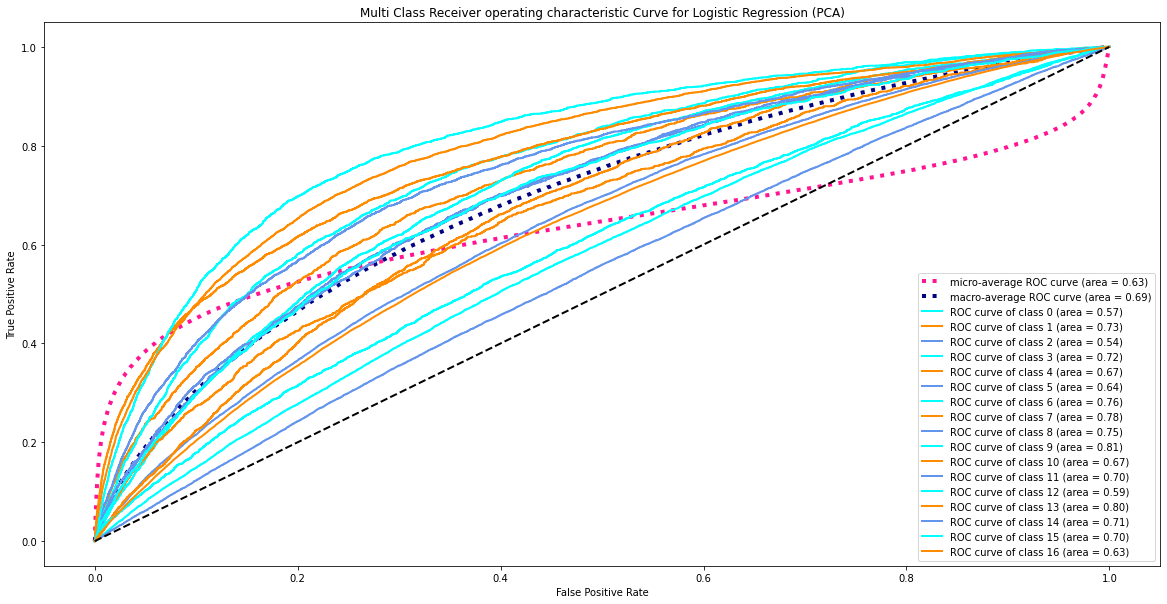

In [53]:
# Plot all ROC curves
plt.figure()
fig, ax = plt.subplots()
ax.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

ax.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    ax.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax.plot([0, 1], [0, 1], 'k--', lw=lw)
#ax.xlim([0.0, 1.0])
#ax.ylim([0.0, 1.05])
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
#ax.xlabel('False Positive Rate')
#ax.ylabel('True Positive Rate')
ax.set_title('Multi Class Receiver operating characteristic Curve for Logistic Regression (PCA)')
ax.legend(loc='lower right')
#prop=FontProperties().set_size('small')
fig.set_size_inches(20, 10)
#fig.show()
plt.savefig('/content/drive/My Drive/Data Mining Assignment/graphs/roc_log_regres_pca.png')